# Import

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Premiers traitements / analyses à mener

1 - Charger le fichier avec read_csv(). Vous devrez utiliser l’option skip_rows (voir la documentation de pandas) puis appliquer la fonction .head()

In [162]:
m = 96

df = pd.read_csv("app/dataset_exoplanets.csv",sep=",",skiprows=m)
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14


2 - Extraire la liste du nom des colonnes du dataset.

In [163]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

3 - Quelle est la taille du dataset ?

In [164]:
print("Taille du dataset : (Lignes, colonnes) :", df.shape)

Taille du dataset : (Lignes, colonnes) : (38449, 92)


4 - Filtrer les colonnes pour ne garder que des valeurs utiles

In [165]:
list_columns = ["pl_name", "sy_snum", "pl_bmassj", "pl_radj", "pl_orbper", "pl_eqt", "discoverymethod","disc_year", "st_teff", "st_rad", "st_mass", "sy_dist", "pl_orbsmax", "pl_insol", 'pl_controv_flag']
df = df[list_columns]
df

,pl_name,sy_snum,pl_bmassj,pl_radj,pl_orbper,pl_eqt,discoverymethod,disc_year,st_teff,st_rad,st_mass,sy_dist,pl_orbsmax,pl_insol,pl_controv_flag
0,11 Com b,2,19.400,NaN,326.03000,NaN,Radial Velocity,2007,4742.0,19.00,2.70,93.1846,1.29000,NaN,0
1,11 Com b,2,17.100,NaN,NaN,NaN,Radial Velocity,2007,NaN,NaN,2.60,93.1846,1.21000,NaN,0
2,11 Com b,2,15.464,NaN,323.21000,NaN,Radial Velocity,2007,4874.0,13.76,2.09,93.1846,1.17800,NaN,0
3,11 UMi b,1,14.740,NaN,516.21997,NaN,Radial Velocity,2009,4213.0,29.79,2.78,125.3210,1.53000,NaN,0
4,11 UMi b,1,10.500,NaN,516.22000,NaN,Radial Velocity,2009,4340.0,24.08,1.80,125.3210,1.54000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38444,ups And d,2,4.132,NaN,1276.46000,NaN,Radial Velocity,1999,NaN,1.56,1.30,13.4054,2.51329,NaN,0
38445,ups Leo b,1,0.510,NaN,385.20000,NaN,Radial Velocity,2021,4836.0,11.22,1.48,52.5973,1.18000,NaN,0
38446,xi Aql b,1,2.020,NaN,NaN,NaN,Radial Velocity,2007,NaN,NaN,1.40,56.1858,0.58000,NaN,0
38447,xi Aql b,1,2.800,NaN,136.75000,NaN,Radial Velocity,2007,4780.0,12.00,2.20,56.1858,0.68000,NaN,0


5 - Renommer les colonnes pour qu’elles aient des noms plus explicites, si besoin.

In [166]:
new_names = {
    "st_teff": "stellar_temp",
    "sy_dist": "distance_parsecs",
}
df = df.rename(new_names, axis=1)
df

,pl_name,sy_snum,pl_bmassj,pl_radj,pl_orbper,pl_eqt,discoverymethod,disc_year,stellar_temp,st_rad,st_mass,distance_parsecs,pl_orbsmax,pl_insol,pl_controv_flag
0,11 Com b,2,19.400,NaN,326.03000,NaN,Radial Velocity,2007,4742.0,19.00,2.70,93.1846,1.29000,NaN,0
1,11 Com b,2,17.100,NaN,NaN,NaN,Radial Velocity,2007,NaN,NaN,2.60,93.1846,1.21000,NaN,0
2,11 Com b,2,15.464,NaN,323.21000,NaN,Radial Velocity,2007,4874.0,13.76,2.09,93.1846,1.17800,NaN,0
3,11 UMi b,1,14.740,NaN,516.21997,NaN,Radial Velocity,2009,4213.0,29.79,2.78,125.3210,1.53000,NaN,0
4,11 UMi b,1,10.500,NaN,516.22000,NaN,Radial Velocity,2009,4340.0,24.08,1.80,125.3210,1.54000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38444,ups And d,2,4.132,NaN,1276.46000,NaN,Radial Velocity,1999,NaN,1.56,1.30,13.4054,2.51329,NaN,0
38445,ups Leo b,1,0.510,NaN,385.20000,NaN,Radial Velocity,2021,4836.0,11.22,1.48,52.5973,1.18000,NaN,0
38446,xi Aql b,1,2.020,NaN,NaN,NaN,Radial Velocity,2007,NaN,NaN,1.40,56.1858,0.58000,NaN,0
38447,xi Aql b,1,2.800,NaN,136.75000,NaN,Radial Velocity,2007,4780.0,12.00,2.20,56.1858,0.68000,NaN,0


6 - Afficher le taux de remplissage de chaque colonne.

In [167]:
print("Taux de remplissage de chaque colonne :")
df.isnull().mean() * 100

Taux de remplissage de chaque colonne :


pl_name              0.000000
sy_snum              0.000000
pl_bmassj           82.738173
pl_radj             31.025514
pl_orbper            8.330516
pl_eqt              56.336966
discoverymethod      0.000000
disc_year            0.000000
stellar_temp         8.346121
st_rad               7.732321
st_mass             15.100523
distance_parsecs     2.184712
pl_orbsmax          43.702047
pl_insol            56.284949
pl_controv_flag      0.000000
dtype: float64

7 - Repérer où sont les valeurs nulles et proposer une explication. Est-ce que ces valeurs n’existent pas ou est-ce qu’elle n’ont pas été remplies ?

In [168]:
print("Valeurs nulles dans le dataset :")
df.isnull().sum()
# ces valeurs nulles existent mais les calculs n'ont pas été effectués pour obtenir les résultats , selon la distance de la planète, sa masse, son rayon, etc et le type de données peut varier.

Valeurs nulles dans le dataset :


pl_name                 0
sy_snum                 0
pl_bmassj           31812
pl_radj             11929
pl_orbper            3203
pl_eqt              21661
discoverymethod         0
disc_year               0
stellar_temp         3209
st_rad               2973
st_mass              5806
distance_parsecs      840
pl_orbsmax          16803
pl_insol            21641
pl_controv_flag         0
dtype: int64

# Quelques comptes

8 - Combien y a-t-il de planètes différentes découvertes ?

In [169]:
print("Planètes unique : ", df.pl_name.nunique())

Planètes unique :  5903


9 - Combien y a-t-il de systèmes doubles ? (c’est-à-dire de systèmes de planètes orbitant autour de deux étoiles)

In [170]:
print("Systèmes doubles : ", df[df['sy_snum'] >= 2].shape[0])

Systèmes doubles :  2932


10 - Combien y a-t-il de découvertes controversées ?

In [171]:
print("Découvertes controversées : ", df[df['pl_controv_flag'] >= 1].shape[0])

Découvertes controversées :  82


11 - En quelle année a-t-on découvert le plus d’exoplanètes ?

In [172]:
print("Année avec le plus d'exoplanètes découvertes :" , df['disc_year'].mode()[0])

Année avec le plus d'exoplanètes découvertes : 2016


12 - Y a-t-il des doublons ? Vous pourrez utiliser les fonctions duplicated() pour répondre à cette question.	 Vous pouvez explorer la fonction drop_duplicates() de Python ensuite pour vous séparer des doublons.

In [173]:
print("Doublons dans le dataset : ", df["pl_name"].duplicated().sum())
print("Nombre de lignes avant suppression des doublons : ", df["pl_name"].shape[0])
print("Nombre de lignes après suppression des doublons : ", df["pl_name"].drop_duplicates().shape[0])
colonnes_numeriques = df.select_dtypes(include=['number']).columns
df_num = df[['pl_name'] + list(colonnes_numeriques)]
df_grouped = df_num.groupby('pl_name', as_index=False).mean()
print("Nombre de lignes après regroupement par nom de planète : ", df_grouped.shape[0])
print(df_grouped.isnull().sum())

print(df[["pl_name","pl_orbper"]].head(10))
print(df_grouped[["pl_name","pl_orbper"]].head(10))

Doublons dans le dataset :  32546
Nombre de lignes avant suppression des doublons :  38449
Nombre de lignes après suppression des doublons :  5903
Nombre de lignes après regroupement par nom de planète :  5903
pl_name                0
sy_snum                0
pl_bmassj           2886
pl_radj             1452
pl_orbper            293
pl_eqt              1511
disc_year              0
stellar_temp         439
st_rad               579
st_mass               36
distance_parsecs     122
pl_orbsmax           291
pl_insol            1780
pl_controv_flag        0
dtype: int64
    pl_name   pl_orbper
0  11 Com b   326.03000
1  11 Com b         NaN
2  11 Com b   323.21000
3  11 UMi b   516.21997
4  11 UMi b   516.22000
5  11 UMi b         NaN
6  14 And b   185.84000
7  14 And b   186.76000
8  14 And b         NaN
9  14 Her b  1773.40002
                   pl_name    pl_orbper
0                 11 Com b   324.620000
1                 11 UMi b   516.219985
2                 14 And b   186.300000
3  

# Analyse univariée et bivariée

13 - Tracer la distribution de chaque indicateur (fonction histplot() de seaborn)

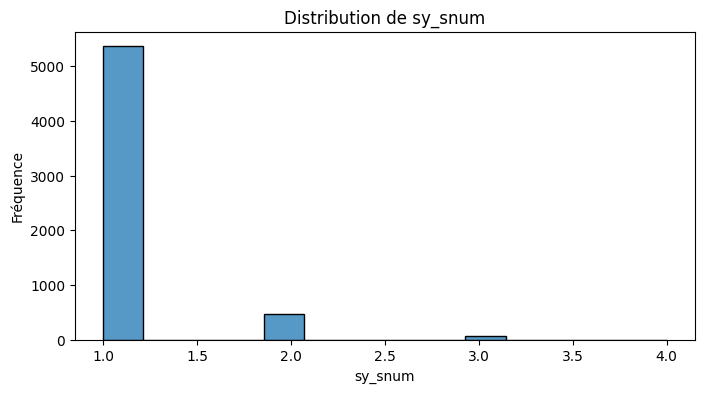

Distribution de chaque indicateur tracée.


In [174]:
col = 'sy_snum'  # nom de la colonne spécifique

plt.figure(figsize=(8, 4))
sns.histplot(df_grouped[col].dropna(), kde=False) 
plt.title(f'Distribution de {col}')
plt.xlabel(col)
plt.ylabel('Fréquence')
plt.show()
print("Distribution de chaque indicateur tracée.")

14 - Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)

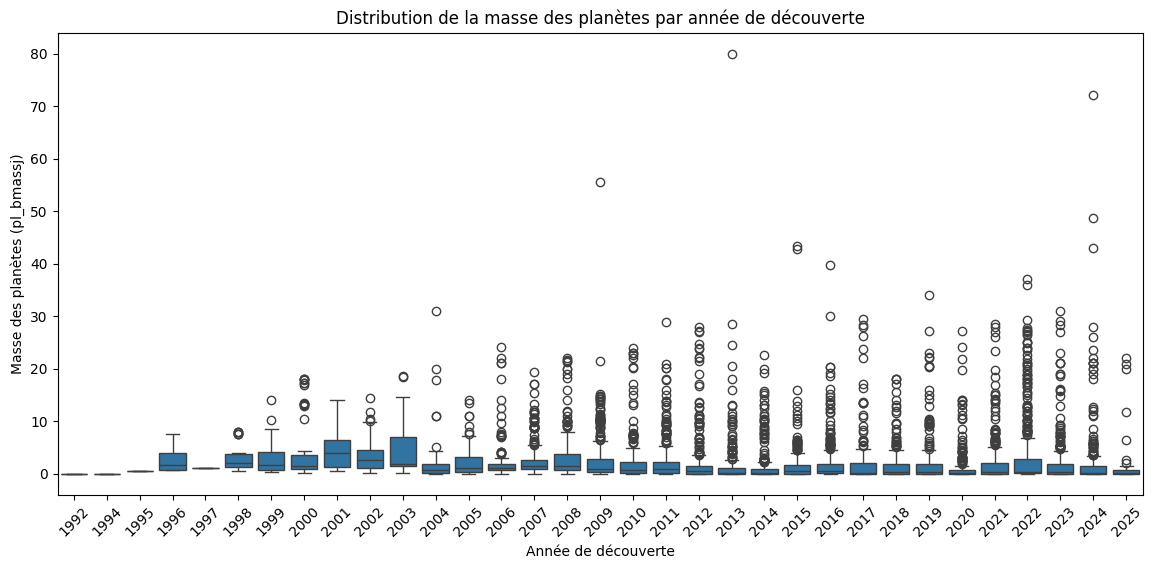

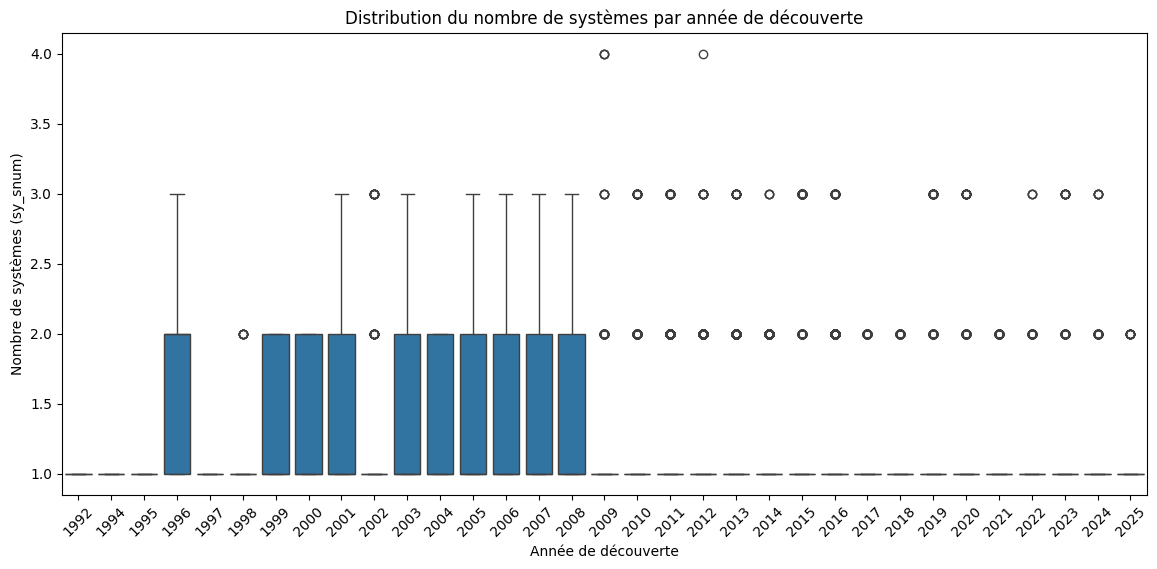

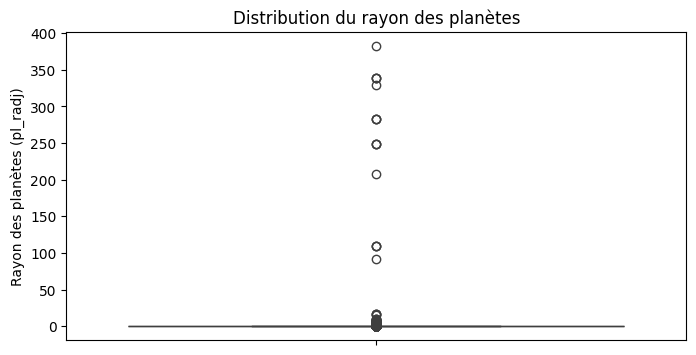

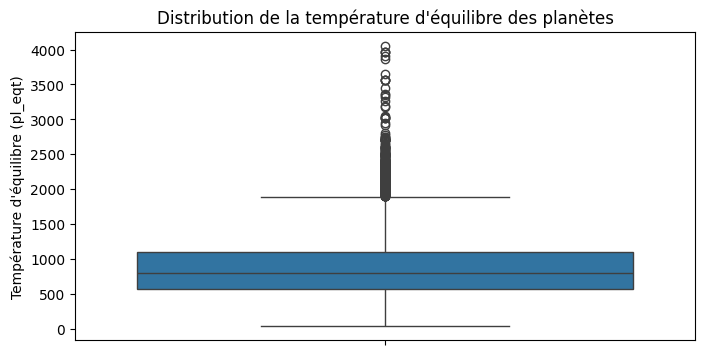

In [175]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="disc_year", y="pl_bmassj")
plt.title("Distribution de la masse des planètes par année de découverte")
plt.xlabel("Année de découverte")
plt.ylabel("Masse des planètes (pl_bmassj)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="disc_year", y="sy_snum")
plt.title("Distribution du nombre de systèmes par année de découverte")
plt.xlabel("Année de découverte")
plt.ylabel("Nombre de systèmes (sy_snum)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(y=df["pl_radj"])
plt.title("Distribution du rayon des planètes")
plt.ylabel("Rayon des planètes (pl_radj)")
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(y=df["pl_eqt"])
plt.title("Distribution de la température d'équilibre des planètes")
plt.ylabel("Température d'équilibre (pl_eqt)")
plt.show()

15 - Calculer la matrice de corrélation et afficher là avec la fonction heatmap() de seaborn. Y a-t-il corrélation entre certaines variables ?

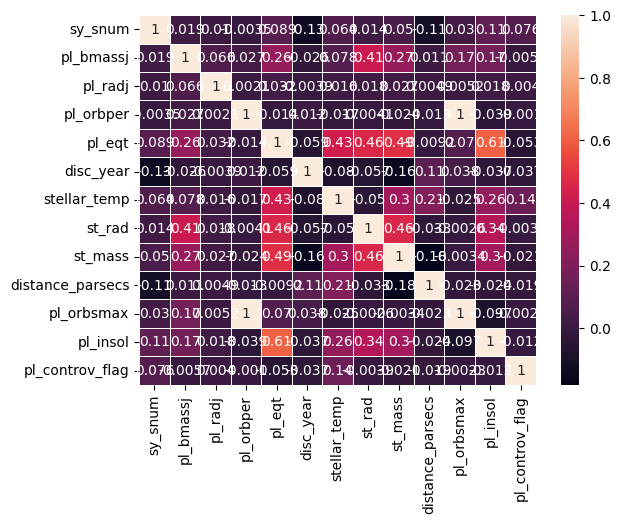

In [176]:
df_correlation = df_grouped.drop(columns=['pl_name']).corr(numeric_only=True)
df_correlation.corr(numeric_only=True)
sns.heatmap(df_correlation, annot=True, linewidth=.5)
plt.show()
# Il y a une corrélation entre pl_orbsmax et pl_orbper ainsi qu'une corrélation forte entre pl_insol et pl_eqt

# Vérification de la troisième loi de Kepler

16 - La troisième loi de Kepler est-elle vérifiée dans le dataset ?

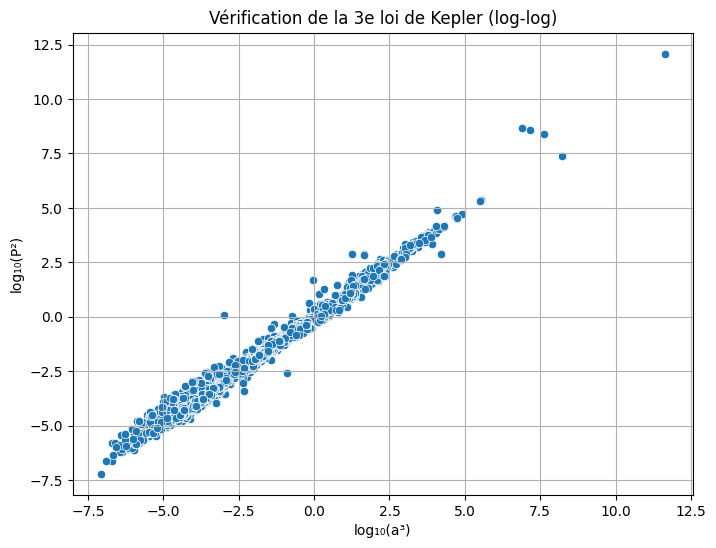

Corrélation entre P² et a³ : 0.9999997974903584


In [177]:
df_kepler = df[['pl_orbper', 'pl_orbsmax']].dropna()
df_kepler['orbper_years'] = df_kepler['pl_orbper'] / 365.25
df_kepler['P_squared'] = df_kepler['orbper_years'] ** 2
df_kepler['a_cubed'] = df_kepler['pl_orbsmax'] ** 3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log10(df_kepler['a_cubed']), y=np.log10(df_kepler['P_squared']))
plt.xlabel("log₁₀(a³)")
plt.ylabel("log₁₀(P²)")
plt.title("Vérification de la 3e loi de Kepler (log-log)")
plt.grid(True)
plt.show()
correlation = df_kepler['P_squared'].corr(df_kepler['a_cubed'])
print("Corrélation entre P² et a³ :", correlation)
# La troisième loi de Kepler est vérifiée dans ce dataset

# Analyse des exoplanètes par tailles

17 - Tracer le graphique suivant :

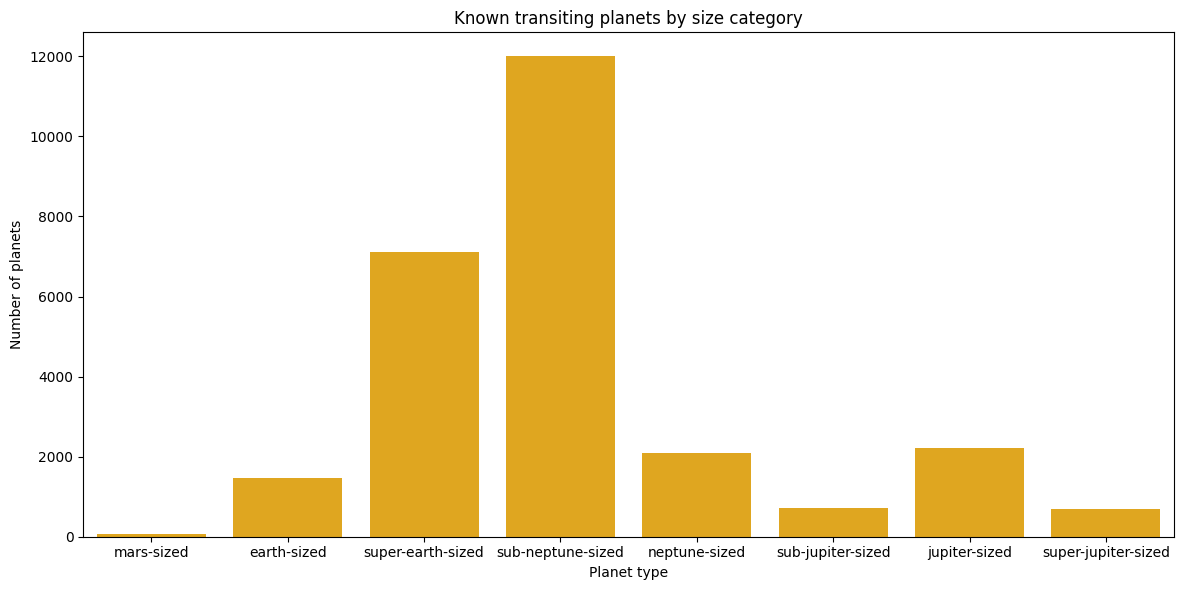

Barplot des planètes par type tracé.
    pl_name  radius_earth planet_type
0  11 Com b           NaN         NaN
1  11 Com b           NaN         NaN
2  11 Com b           NaN         NaN
3  11 UMi b           NaN         NaN
4  11 UMi b           NaN         NaN
5  11 UMi b           NaN         NaN
6  14 And b           NaN         NaN
7  14 And b           NaN         NaN
8  14 And b           NaN         NaN
9  14 Her b           NaN         NaN


In [178]:
# 1. Conversion du rayon en rayons terrestres si nécessaire
if 'pl_rade' in df.columns:
    df['radius_earth'] = df['pl_rade']
else:
    df['radius_earth'] = df['pl_radj'] * 11.2  # 1 Jupiter radius = 11.2 Earth radii

# 2. Définition des intervalles et labels pour chaque catégorie de planète
bins = [0, 0.53, 1, 1.75, 3.5, 6, 9, 15, 22]
labels = [
    'mars-sized', 
    'earth-sized', 
    'super-earth-sized', 
    'sub-neptune-sized', 
    'neptune-sized', 
    'sub-jupiter-sized', 
    'jupiter-sized', 
    'super-jupiter-sized'
]

# 3. Création de la colonne planet_type
df['planet_type'] = pd.cut(df['radius_earth'], bins=bins, labels=labels, right=True, include_lowest=True)

# 4. Comptage des planètes par catégorie
planet_counts = df['planet_type'].value_counts().reindex(labels, fill_value=0)

# 5. Tracé du barplot
plt.figure(figsize=(12,6))
sns.barplot(x=planet_counts.index, y=planet_counts.values, color='#FFB300')
plt.title("Known transiting planets by size category")
plt.xlabel("Planet type")
plt.ylabel("Number of planets")
plt.tight_layout()
plt.show()
print("Barplot des planètes par type tracé.")

# Affichage de quelques lignes pour contrôle
print(df[['pl_name', 'radius_earth', 'planet_type']].head(10))

# Analyse des exoplanètes par densité

18 - Partout où c’est possible, calculez la densité de la planète avec la formule suivante, exprimant le rapport entre la masse de la planète et son volume :

In [179]:
# Conversion des unités (en kg et en m)
MJUP_KG = 1.898e27       # Masse de Jupiter en kg
RJUP_M = 7.1492e7        # Rayon de Jupiter en mètres

# Création d'une copie de df pour éviter conflits
df_density = df.copy()

# Vérification que les deux colonnes nécessaires ne sont pas nulles
df_density = df_density[(~df_density['pl_bmassj'].isnull()) & (~df_density['pl_radj'].isnull())]

# Conversion des unités
df_density['mass_kg'] = df_density['pl_bmassj'] * MJUP_KG
df_density['radius_m'] = df_density['pl_radj'] * RJUP_M

# Calcul du volume et de la densité
df_density['volume_m3'] = (4/3) * np.pi * df_density['radius_m'] ** 3
df_density['density_kg_m3'] = df_density['mass_kg'] / df_density['volume_m3']

# Conversion de la densité en g/cm³ (optionnel mais courant en astro)
df_density['density_g_cm3'] = df_density['density_kg_m3'] / 1000

# Affichage de quelques résultats
df_density[['pl_name', 'mass_kg', 'radius_m', 'density_kg_m3', 'density_g_cm3']].head()

,pl_name,mass_kg,radius_m,density_kg_m3,density_g_cm3
30,1RXS J160929.1-210524 b,1.518400e+28,1.189627e+08,2153.105349,2.153105
39,2MASS J02192210-3925225 b,2.638220e+28,1.029485e+08,5772.481938,5.772482
105,55 Cnc e,4.825172e+25,1.218215e+07,6371.655505,6.371656
108,55 Cnc e,4.663933e+25,1.326643e+07,4768.721141,4.768721
109,55 Cnc e,4.825172e+25,1.224593e+07,6272.616043,6.272616


19 - Remplissez une nouvelle colonne “composition” avec les labels “rocky” (rocheux) ou “gaseous” (gazeux) suivant la densité de la planète. Pour information, voici les données des planètes du Système Solaire et leurs labels :

In [180]:
# Ajout d'une colonne composition en fonction de la densité
df_density['composition'] = df_density['density_g_cm3'].apply(
    lambda d: 'rocky' if d >= 3.5 else 'gaseous'
)

df_density[['pl_name', 'density_g_cm3', 'composition']].head(10)

,pl_name,density_g_cm3,composition
30,1RXS J160929.1-210524 b,2.153105,gaseous
39,2MASS J02192210-3925225 b,5.772482,rocky
105,55 Cnc e,6.371656,rocky
108,55 Cnc e,4.768721,rocky
109,55 Cnc e,6.272616,rocky
117,55 Cnc e,5.936617,rocky
118,55 Cnc e,6.394936,rocky
119,55 Cnc e,6.660150,rocky
120,55 Cnc e,4.415739,rocky
121,55 Cnc e,6.229884,rocky


20 - Quel critère utiliser pour remplir les labels sur la composition à partir des planètes du système solaire ? Vous pourrez utiliser un critère de seuil et un algorithme de classification supervisée, entraîné sur les données du système solaire, puis comparer les résultats.

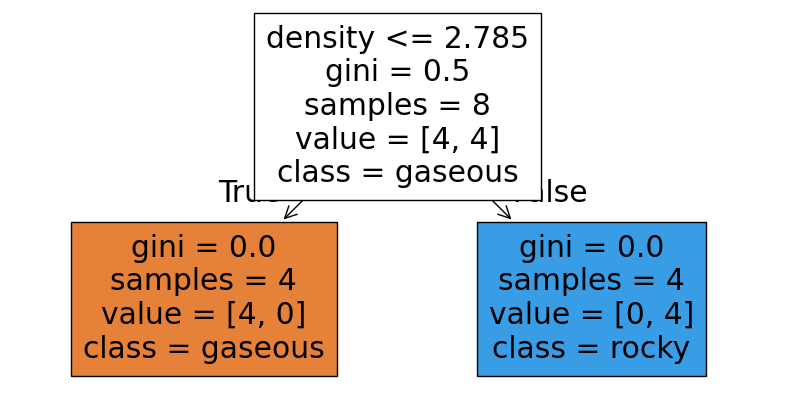

                       pl_name  density_g_cm3 composition composition_tree
30     1RXS J160929.1-210524 b       2.153105     gaseous          gaseous
39   2MASS J02192210-3925225 b       5.772482       rocky            rocky
105                   55 Cnc e       6.371656       rocky            rocky
108                   55 Cnc e       4.768721       rocky            rocky
109                   55 Cnc e       6.272616       rocky            rocky
117                   55 Cnc e       5.936617       rocky            rocky
118                   55 Cnc e       6.394936       rocky            rocky
119                   55 Cnc e       6.660150       rocky            rocky
120                   55 Cnc e       4.415739       rocky            rocky
121                   55 Cnc e       6.229884       rocky            rocky


In [181]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Données du Système Solaire (exemple simplifié)
# Nom, masse (M_Jup), rayon (R_Jup), densité (g/cm³), composition
solar_data = [
    # rocky planets
    ["Mercure", 0.00017, 0.034, 5.43, "rocky"],
    ["Vénus",   0.00256, 0.087, 5.24, "rocky"],
    ["Terre",   0.00315, 0.089, 5.51, "rocky"],
    ["Mars",    0.00034, 0.047, 3.93, "rocky"],
    # gaseous planets
    ["Jupiter", 1.0,     1.0,   1.33, "gaseous"],
    ["Saturne", 0.299,   0.843, 0.69, "gaseous"],
    ["Uranus",  0.046,   0.357, 1.27, "gaseous"],
    ["Neptune", 0.054,   0.346, 1.64, "gaseous"],
]

# DataFrame des données
solar_df = pd.DataFrame(solar_data, columns=["name", "pl_bmassj", "pl_radj", "density_g_cm3", "composition"])

# Données d'entrainement
X_train = solar_df[["density_g_cm3"]]
y_train = solar_df["composition"]

# Entrainement de l'arbre 
clf = DecisionTreeClassifier(max_depth=None, random_state=None)
clf.fit(X_train, y_train)

# Test de l'arbre sur les explonates

X_test = df_density[["density_g_cm3"]]
df_density["composition_tree"] = clf.predict(X_test)

# Affichage de l'arbre
plt.figure(figsize=(10,5))
plot_tree(clf, feature_names=["density"], class_names=clf.classes_, filled=True)
plt.show()

# Comparaison des deux méthodes
print(df_density[["pl_name", "density_g_cm3", "composition", "composition_tree"]].head(10))

# Analyse des exoplanètes par rayon / masse et période orbitale

21 - En colorisant vos graphiques à l’aide des colonnes “planet_type” et / ou “composition” (argument hue dans le scatterplot de seaborn), tracer des équivalents des graphiques suivant. Attention à l’échelle utilisée !

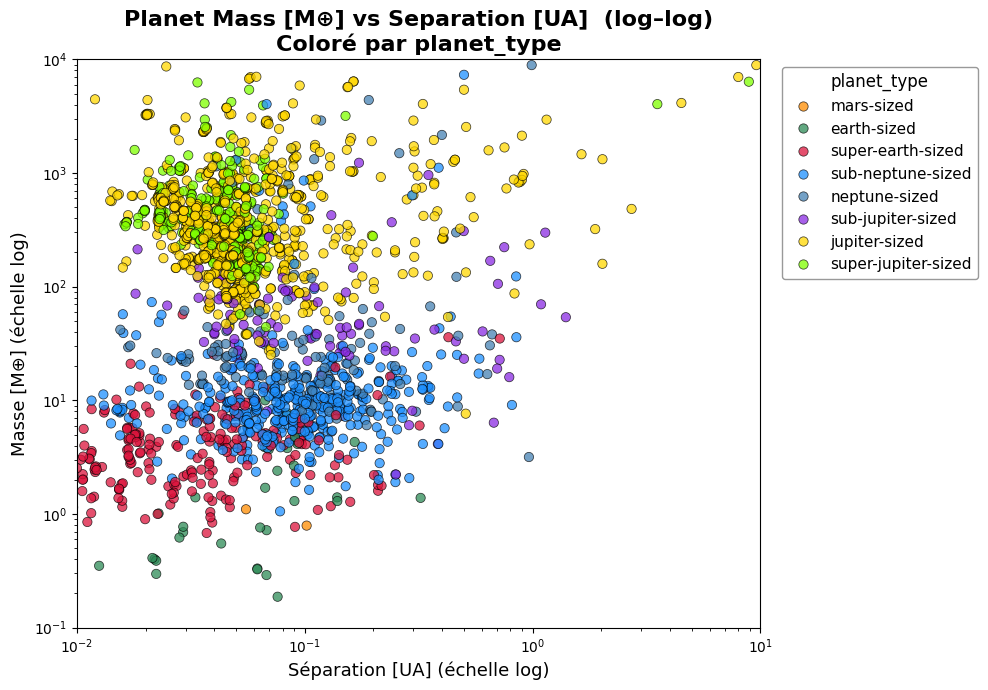

In [182]:
# 21.a) Planet Mass [Earth Mass] vs Separation [AU], coloré par planet_type (log–log)
# ---------------------------------------------------------------------------------
# Conversion : pl_bmassj (Jupiter Mass) -> Earth Mass
MJUP_TO_MEARTH = 317.8
df_density["mass_earth"] = df_density["pl_bmassj"] * MJUP_TO_MEARTH

# Séparation en UA : pl_orbsmax
# Préparer le DataFrame pour le plot
plot_df1 = df_density.dropna(subset=["mass_earth", "pl_orbsmax", "planet_type"]).copy()

# Palette personnalisée basée sur planet_type (mêmes labels que dans la Question 17)
palette_planet_type = {
    "mars-sized":             "#FF8C00",
    "earth-sized":            "#2E8B57",
    "super-earth-sized":      "#DC143C",
    "sub-neptune-sized":      "#1E90FF",
    "neptune-sized":          "#4682B4",
    "sub-jupiter-sized":      "#8A2BE2",
    "jupiter-sized":          "#FFD700",
    "super-jupiter-sized":    "#7FFF00"
}

plt.figure(figsize=(10, 7))
ax1 = sns.scatterplot(
    data=plot_df1,
    x="pl_orbsmax",        # Séparation [AU]
    y="mass_earth",        # Masse [Earth Mass]
    hue="planet_type",
    palette=palette_planet_type,
    edgecolor="black",
    alpha=0.75,
    s=45
)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(0.01, 10)
ax1.set_ylim(0.1, 1e4)
ax1.set_title(
    "Planet Mass [M⊕] vs Separation [UA]  (log–log)\nColoré par planet_type",
    fontsize=16, fontweight="bold"
)
ax1.set_xlabel("Séparation [UA] (échelle log)", fontsize=13)
ax1.set_ylabel("Masse [M⊕] (échelle log)", fontsize=13)
legend1 = ax1.legend(
    title="planet_type",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    frameon=True,
    fontsize=11,
    title_fontsize=12
)
legend1.get_frame().set_edgecolor("gray")
plt.tight_layout()
plt.show()

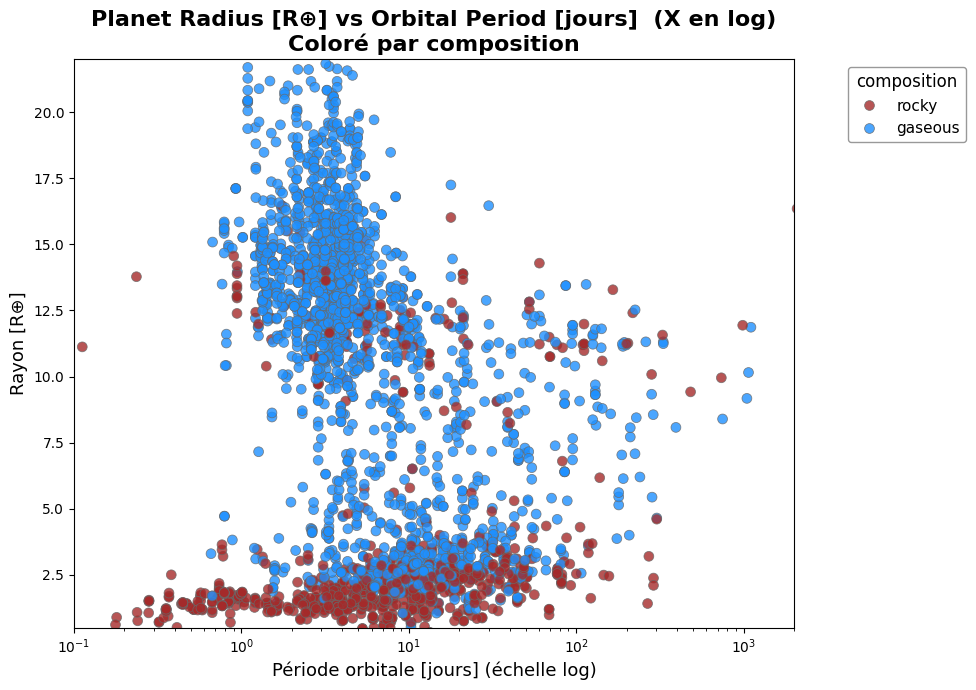

In [184]:
# 21.b) Planet Radius [Earth Radius] vs Orbital Period [jours], coloré par composition (X en log)
# ------------------------------------------------------------------------------------------------
# Conversion : pl_radj (Jupiter Radius) -> Earth Radius
RJUP_TO_REARTH = 11.2
df_density["radius_earth"] = df_density["pl_radj"] * RJUP_TO_REARTH

# S'assurer que la colonne composition existe
if "composition" not in df_density.columns:
    # Si la densité n'existe pas, la recalculer
    if "density_g_cm3" not in df_density.columns:
        MJUP_KG = 1.898e27
        RJUP_M = 7.1492e7
        df_density['mass_kg'] = df_density['pl_bmassj'] * MJUP_KG
        df_density['radius_m'] = df_density['pl_radj'] * RJUP_M
        df_density['volume_m3'] = (4/3) * np.pi * df_density['radius_m'] ** 3
        df_density['density_kg_m3'] = df_density['mass_kg'] / df_density['volume_m3']
        df_density['density_g_cm3'] = df_density['density_kg_m3'] / 1000

    df_density['composition'] = df_density['density_g_cm3'].apply(
        lambda d: 'rocky' if d >= 3.5 else 'gaseous'
    )

# Préparer DataFrame pour le plot
plot_df2 = df_density.dropna(subset=["radius_earth", "pl_orbper", "composition"]).copy()

# Palette personnalisée basée sur composition (rocky vs gaseous)
palette_composition = {
    "rocky":  "#A52A2A",
    "gaseous": "#1E90FF"
}

plt.figure(figsize=(10, 7))
ax2 = sns.scatterplot(
    data=plot_df2,
    x="pl_orbper",             # Période orbitale [jours]
    y="radius_earth",          # Rayon [Earth Radius]
    hue="composition",
    palette=palette_composition,
    edgecolor="dimgray",
    alpha=0.80,
    s=50
)
ax2.set_xscale("log")
ax2.set_xlim(0.1, 2000)
ax2.set_ylim(0.5, 22)
ax2.set_title(
    "Planet Radius [R⊕] vs Orbital Period [jours]  (X en log)\nColoré par composition",
    fontsize=16, fontweight="bold"
)
ax2.set_xlabel("Période orbitale [jours] (échelle log)", fontsize=13)
ax2.set_ylabel("Rayon [R⊕]", fontsize=13)
legend2 = ax2.legend(
    title="composition",
    loc="upper right",
    bbox_to_anchor=(1.25, 1),
    frameon=True,
    fontsize=11,
    title_fontsize=12
)
legend2.get_frame().set_edgecolor("gray")
plt.tight_layout()
plt.show()